### Imports

In [1]:
import pandas as pd
import hvplot.pandas

### Read in the hotel data

In [2]:
hotel_data = pd.read_csv('./hotel_bookings_raw.csv')
display(hotel_data.columns)
hotel_data.describe()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'MO_YR', 'CPI_AVG',
       'INFLATION', 'INFLATION_CHG', 'CSMR_SENT', 'UNRATE', 'INTRSRT', 'GDP',
       'FUEL_PRCS', 'CPI_HOTELS', 'US_GINI', 'DIS_INC'],
      dtype='object')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000,119209.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,2.043988,-0.008392,93.093092,4.827968,1.120033,18796.312904,157.648724,0.177324,41.151516,41970.477321
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.203388,0.095700,3.272362,0.279105,0.301925,401.008690,21.373932,0.023984,0.049977,426.739880
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.600000,-0.200000,87.200000,4.300000,0.750000,17991.348000,113.400000,0.107059,41.100000,41182.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,1.900000,-0.100000,91.000000,4.700000,1.000000,18425.306000,149.800000,0.165677,41.100000,41680.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,2.100000,0.000000,93.100000,4.900000,1.000000,18775.459000,161.100000,0.183547,41.200000,41850.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,2.200000,0.100000,96.300000,5.000000,1.250000,19148.194000,171.500000,0.189821,41.200000,42274.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,2.300000,0.100000,98.500000,5.700000,1.750000,19561.896000,204.200000,0.236504,41.200000,42834.000000


## Create a true DateTime column as index

In [3]:
# Hotel stay arrival dates are broken up into separate columns of strings and ints
# First step, convert year to string 
hotel_data['arrival_date_year']=hotel_data['arrival_date_year'].astype(str)
# Convert day of month to string also
hotel_data['arrival_date_day_of_month']=hotel_data['arrival_date_day_of_month'].astype(str)
# Combine year, month, day of month into one column in style 2016-July-5
hotel_data['arrival_date_str']=hotel_data['arrival_date_year']+"-"+hotel_data['arrival_date_month']+"-"+hotel_data['arrival_date_day_of_month']
# Convert the string date column into DateTime
hotel_data['arrival_date']=pd.to_datetime(hotel_data['arrival_date_str'])
# Drop the string column
hotel_data=hotel_data.drop(['arrival_date_str'],axis='columns')
# Set index to DateTime
hotel_data=hotel_data.set_index('arrival_date')

## Calculating revenue of the stays

In [4]:
#calculating the stay revenue based on the AverageDailyRate and the number of days of the stay
hotel_data['revenue']=hotel_data['adr']*(hotel_data['stays_in_weekend_nights']+hotel_data['stays_in_week_nights'])

## Checking the data for issues with later analysis

<Axes: title={'center': 'Adult count for stay'}, xlabel='adults', ylabel='stay count'>

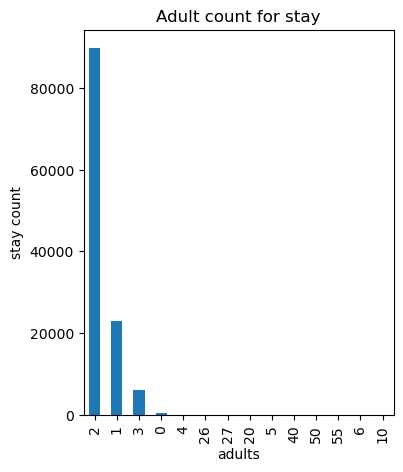

In [5]:
# Checking the adults column
display(hotel_data['adults'].value_counts().plot(kind='bar',ylabel='stay count',title='Adult count for stay',figsize=[4,5]))    
# The stays with large groups will cause issues later, eliminating all stays > 5 adults
hotel_data = hotel_data[hotel_data['adults']<5]


In [6]:
# Confirm filtered
hotel_data['adults'].value_counts()

adults
2    89680
1    23027
3     6202
0      403
4       62
Name: count, dtype: int64

<Axes: xlabel='adults'>

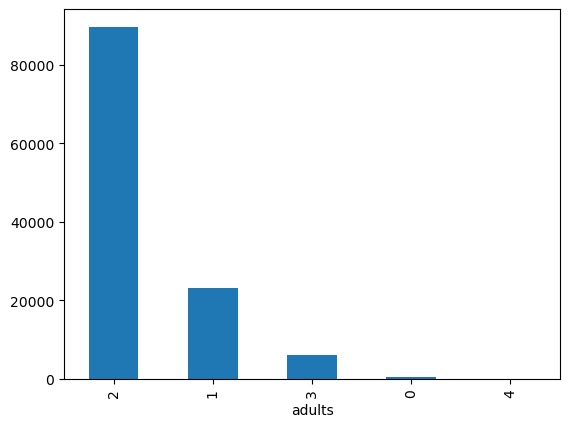

In [7]:
# Graph looking better
hotel_data['adults'].value_counts().plot(kind='bar')         

<Axes: xlabel='children'>

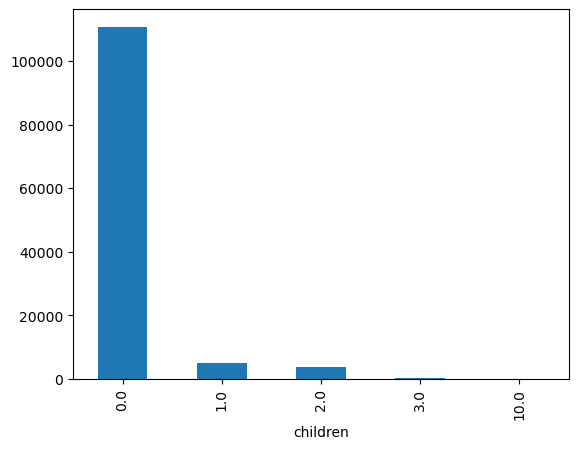

In [8]:
#Checking children, seems ok
hotel_data['children'].value_counts().plot(kind='bar')         

<Axes: xlabel='babies'>

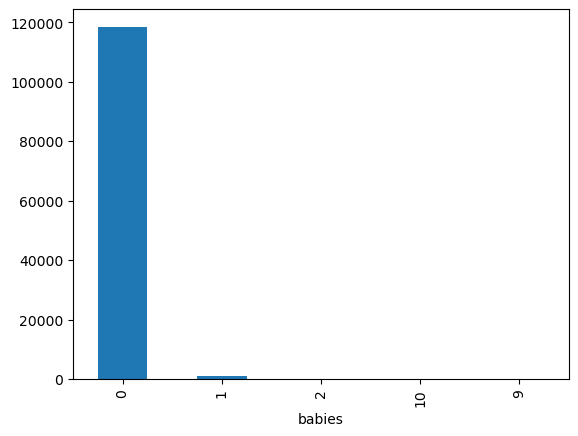

In [9]:
# Checking # of babies, seems ok 
hotel_data['babies'].value_counts().plot(kind='bar')         

C:\Users\jason\AppData\Local\Temp\ipykernel_18420\4115261444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_data[hotel_data['countries']=='United Kingdom of Great Britain and Northern Ireland']['country']='UK'


<Axes: title={'center': 'Top 10 Countries'}, xlabel='countries', ylabel='stay count'>

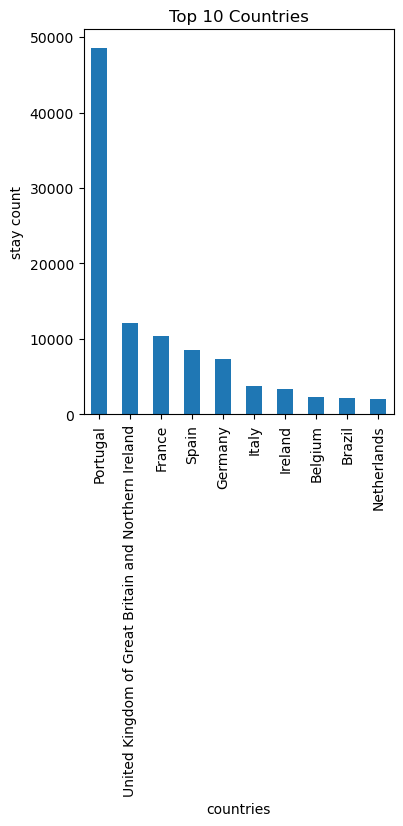

In [10]:
#Checking customer country of residence
#Pull in country code CSV from https://gist.github.com/radcliff/f09c0f88344a7fcef373
countries=pd.read_csv('./all.csv')
countries=countries.set_index('alpha-3')
# convert 3-letter country codes to longform
hotel_data['countries']=pd.merge(hotel_data['country'],countries['name'],how='left',left_on='country',right_on=countries.index)['name'].values
# UK country name obnoxiously long, so fix
hotel_data[hotel_data['countries']=='United Kingdom of Great Britain and Northern Ireland']['country']='UK'
# Graph top ten
hotel_data['countries'].value_counts().iloc[0:10].plot(kind='bar',ylabel='stay count',title='Top 10 Countries',figsize=[4,5]) 

<Axes: xlabel='market_segment'>

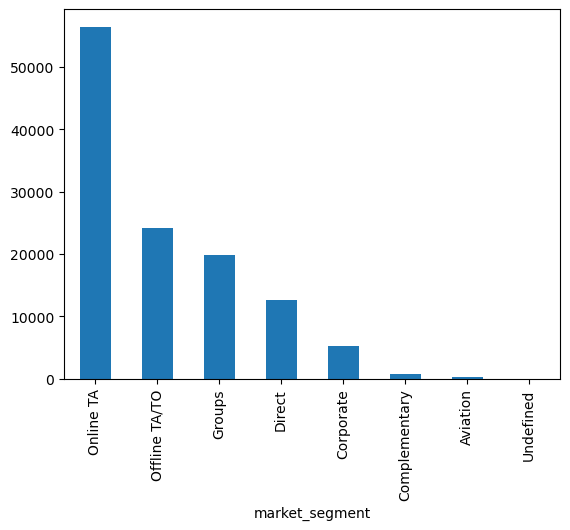

In [11]:
#Checking customer type 
hotel_data['market_segment'].value_counts().plot(kind='bar')         

<Axes: xlabel='distribution_channel'>

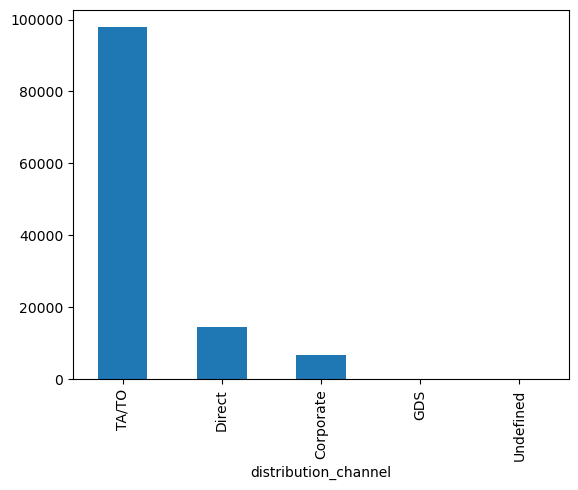

In [12]:
#Checking booking distribution channel
hotel_data['distribution_channel'].value_counts().plot(kind='bar')         

<Axes: xlabel='reserved_room_type'>

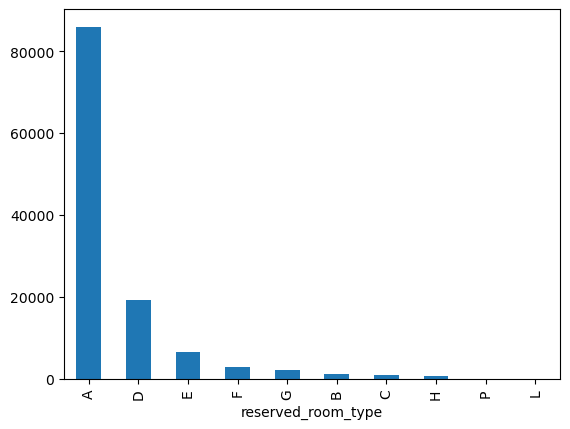

In [13]:
# Reviewing reserved room type
hotel_data['reserved_room_type'].value_counts().plot(kind='bar')         

<Axes: xlabel='assigned_room_type'>

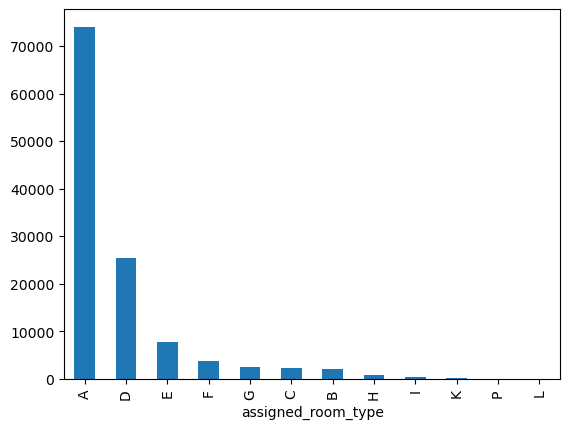

In [14]:
# Reviewing assigned room type
hotel_data['assigned_room_type'].value_counts().plot(kind='bar')       

In [15]:
# Reviewing customer type
print(hotel_data['customer_type'].value_counts())                              

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                561
Name: count, dtype: int64


In [16]:
#ADR is the Average daily rate per stay, so important for revenue calcs
hotel_data['adr'].hvplot.hist(bins=100,xlim=[0,500],title='Average Daily Rate for Room',xlabel='ADR for Room [$]',ylabel='stay count')                        

:Histogram   [adr]   (adr_count)

In [17]:
# Trying to identify why revenue is zero for some stays. Couldn't identify it.
hotel_data[hotel_data['revenue']==0].describe().iloc[:,0:17]

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1005.000000,1943.000000,1943.0,1943.000000,1943.000000
mean,0.101390,37.197118,28.788986,0.386516,1.220793,1.412764,0.067422,0.012867,0.275862,0.097787,0.848173,0.501801,104.401990,1.326814,0.0,0.055584,0.595986
std,0.301922,77.246577,15.202571,1.020068,2.304149,0.659621,0.322650,0.112728,0.447063,0.523112,3.296396,1.353894,117.612765,11.652925,0.0,0.229176,0.860463
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,4.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,31.000000,42.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,240.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,737.000000,53.000000,14.000000,35.000000,4.000000,3.000000,1.000000,1.000000,5.000000,32.000000,21.000000,531.000000,150.000000,0.0,1.000000,4.000000


### Per-Hotel Revenue

<Axes: title={'center': 'Hotel Revenues'}, xlabel='Date', ylabel='Revenue [$]'>

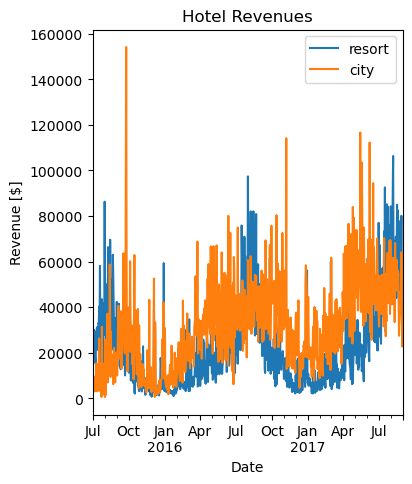

In [18]:
revenue_data=pd.DataFrame()
resort_data=hotel_data[hotel_data['hotel']=='Resort Hotel']
city_data=hotel_data[hotel_data['hotel']=='City Hotel']
revenue_data['resort']=resort_data['revenue'].groupby('arrival_date').sum()
revenue_data['city']=city_data['revenue'].groupby('arrival_date').sum()
display(revenue_data.plot(kind='line',xlabel='Date',ylabel='Revenue [$]',title='Hotel Revenues',figsize=[4,5]))

## Export data to clean csv

In [19]:
hotel_data.to_csv('./clean_hotel_data.csv')

In [20]:
revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum()

arrival_date
2015-07-31     885263.67
2015-08-31    1176179.48
2015-09-30     638048.22
2015-10-31     365355.96
2015-11-30     194727.42
2015-12-31     266833.76
2016-01-31     113781.99
2016-02-29     241456.13
2016-03-31     376418.42
2016-04-30     482966.68
2016-05-31     519567.90
2016-06-30     720613.80
2016-07-31    1179067.98
2016-08-31    1598727.45
2016-09-30     750103.34
2016-10-31     522836.79
2016-11-30     237227.73
2016-12-31     338251.86
2017-01-31     203635.98
2017-02-28     287336.92
2017-03-31     435927.44
2017-04-30     650157.21
2017-05-31     696435.78
2017-06-30    1008009.05
2017-07-31    1676936.69
2017-08-31    1878159.92
Freq: M, Name: resort, dtype: float64

## Start of ARIMA forecasting of revenue

c:\Users\jason\mambaforge\envs\devenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jason\AppData\Local\Temp\ipykernel_18420\122586820.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: title={'center': 'Resort Revenue and Forecast'}, xlabel='Year', ylabel='Revenue [$]'>

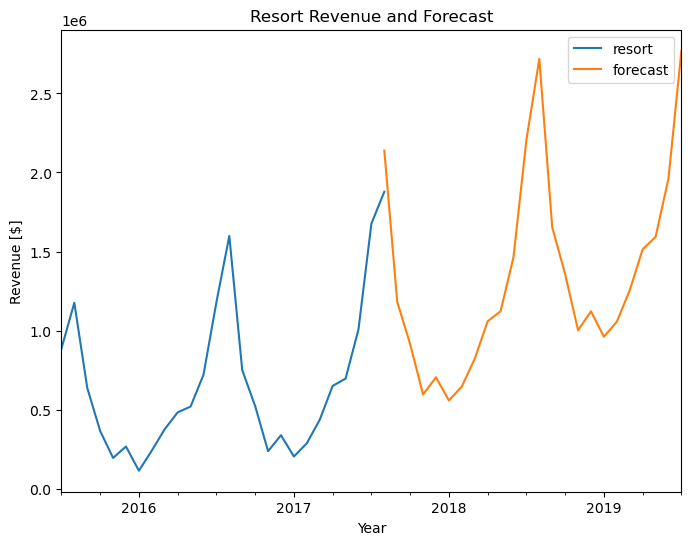

In [21]:
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 25, end = 25+24, dynamic= True)  
future_revenue[['resort', 'forecast']].plot(xlabel='Year', ylabel='Revenue [$]',figsize=(8, 6),title='Resort Revenue and Forecast') 

c:\Users\jason\mambaforge\envs\devenv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\jason\AppData\Local\Temp\ipykernel_18420\2072451509.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_revenue=pd.concat([revenue,future_datest_df])


<Axes: title={'center': 'City Hotel Revenue and Forecast'}, xlabel='Year', ylabel='Revenue [$]'>

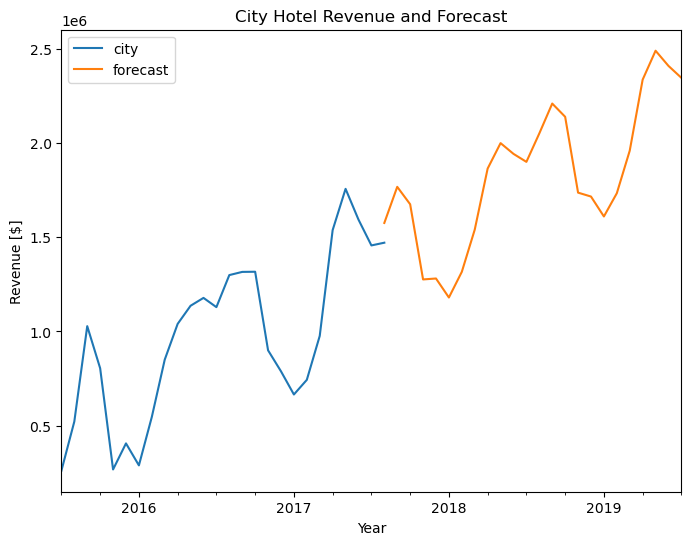

In [22]:
#rolling revenue into monthly https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month
revenue=pd.DataFrame(revenue_data['city'].groupby(pd.Grouper(freq='M')).sum())
#utilizing ARIMA to forecast forward https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(revenue,order=(1, 1, 0),seasonal_order=(1,1,1,12))
results=model.fit()
future_dates=[revenue.index[-1]+ pd.tseries.offsets.DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=revenue.columns)
future_datest_df.tail()
future_revenue=pd.concat([revenue,future_datest_df])
future_revenue['forecast'] = results.predict(start = 25, end = 25+24, dynamic= True)  
future_revenue[['city', 'forecast']].plot(xlabel='Year', ylabel='Revenue [$]',figsize=(8, 6),title='City Hotel Revenue and Forecast') 

In [51]:
from bokeh.models import DatetimeTickFormatter
from bokeh.models import NumeralTickFormatter
month_formatter = DatetimeTickFormatter(years=['%b-%Y'])
revenue_formatter = NumeralTickFormatter(format="$0,0")
display(revenue_data['city'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=45,xformatter=month_formatter,yformatter=revenue_formatter))
revenue_data['resort'].groupby(pd.Grouper(freq='M')).sum().hvplot.bar(rot=45,xformatter=month_formatter,yformatter=revenue_formatter)
#.hvplot.bar(y=['revenue'],groupby='hotel',idget_location='left_top')

c:\Users\jason\mambaforge\envs\devenv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [arrival_date]   (city)

c:\Users\jason\mambaforge\envs\devenv\Lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Bars   [arrival_date]   (resort)

In [25]:
hotel_data
#.hvplot.bar(y=['revenue'],groupby='hotel',idget_location='left_top')



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC,revenue,countries
arrival_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.00,Portugal
2015-07-01,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,0.00,Portugal
2015-07-01,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,75.00,United Kingdom of Great Britain and Northern I...
2015-07-01,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,75.00,United Kingdom of Great Britain and Northern I...
2015-07-01,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0,196.00,United Kingdom of Great Britain and Northern I...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-30,City Hotel,0,23,2017,August,35,30,2,5,2,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,672.98,Belgium
2017-08-31,City Hotel,0,102,2017,August,35,31,2,5,3,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1578.01,France
2017-08-31,City Hotel,0,34,2017,August,35,31,2,5,2,...,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0,1103.97,Germany
